# <h1> Overview

- This notebook mainly focuses on investigating the dataset "full_moodys" from Accern's moodys pipeline, aimming to check the data quality and find out insights through different levels (story, event, entity) in the dataset
- This notebook contains data researching and data engineering
- Some statistical functions with data visualizations are used to check the distribution of key metrics in the dataset so that the following selected columns with numerical values are used for the whole exploratory analysis including the detection of potential imbalanced data

# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read In `full_moodys.csv`

Key metrics can be used for the statistical analysis & exploratory analysis:

- **story_id**
- **new_story_group** 
- **story_group_sentiment_avg**
- **story_group_sentiment_stdev**
- **story_sentiment** 
- **provider_id**
- **story_group_count**
- **story_type**
- **harvested_at** 
- **story_group_saturation**
- **signal_id**
- **entity_ticker**
- **event**
- **event_group** 
- **entity_relevance**
- **entity_sentiment**
- **event_relevance** 
- **event_sentiment**
- **event_hits**
- **entity_share_class_figi** 

In [2]:
df_moodys = pd.read_csv("full_moodys.csv", parse_dates=["harvested_at"])

/Users/yangyufan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_moodys.head(3)

,story_id,article_title,article_url,new_story_group,story_group_sentiment_avg,story_group_sentiment_stdev,story_sentiment,provider_id,story_group_count,story_group_id,...,entity_exch_code,entity_figi,entity_text,entity_industry,entity_market_sector,entity_region,entity_sector,entity_share_class_figi,entity_type,entity_unique_id
0,5c2727098b82f00001aa4d41,Delek US Holdings Inc (DK) Given Average Recom...,https://www.americanbankingnews.com/2018/12/29...,f,56.0,22.9,62.4,9,3,36195335-b6aa-497b-9176-317001f6d9e4,...,UN,BBG00FZYJDX8,"{""{{Delek US Holdings}} Inc (DK) Given Average...",Integrated oil Companies,UNASSIGNED,Americas,Energy,BBG00FZYFVD4,us_equity,EQ0000000055046594
1,5c2727098b82f00001aa4d41,Delek US Holdings Inc (DK) Given Average Recom...,https://www.americanbankingnews.com/2018/12/29...,f,56.0,22.9,62.4,9,3,36195335-b6aa-497b-9176-317001f6d9e4,...,UN,BBG00FZYJDX8,"{""{{Delek US Holdings}} Inc (DK) Given Average...",Integrated oil Companies,UNASSIGNED,Americas,Energy,BBG00FZYFVD4,us_equity,EQ0000000055046594
2,5c2727098b82f00001aa4d41,Delek US Holdings Inc (DK) Given Average Recom...,https://www.americanbankingnews.com/2018/12/29...,f,56.0,22.9,62.4,9,3,36195335-b6aa-497b-9176-317001f6d9e4,...,UN,BBG00FZYJDX8,"{""{{Delek US Holdings}} Inc (DK) Given Average...",Integrated oil Companies,UNASSIGNED,Americas,Energy,BBG00FZYFVD4,us_equity,EQ0000000055046594


In [4]:
df_moodys.columns.values

array(['story_id', 'article_title', 'article_url', 'new_story_group',
       'story_group_sentiment_avg', 'story_group_sentiment_stdev',
       'story_sentiment', 'provider_id', 'story_group_count',
       'story_group_id', 'story_source', 'story_type', 'harvested_at',
       'source_category', 'story_group_saturation', 'signal_id',
       'event_max_relevance', 'entity_exchange', 'entity_name',
       'entity_ticker', 'event', 'event_group', 'entity_relevance',
       'entity_sentiment', 'event_relevance', 'event_sentiment',
       'event_hits', 'entity_composite_figi', 'entity_country',
       'entity_exch_code', 'entity_figi', 'entity_text',
       'entity_industry', 'entity_market_sector', 'entity_region',
       'entity_sector', 'entity_share_class_figi', 'entity_type',
       'entity_unique_id'], dtype=object)

In [5]:
print(f'{df_moodys.shape[0]} samples and {df_moodys.shape[1]} features in the full_moodys dataset.')

2192838 samples and 39 features in the full_moodys dataset.


There are 675404 unique stories in our full_moodys dataset.

In [6]:
len(df_moodys['story_id'].unique())

675404

In [7]:
df_moodys.describe(include = ["datetime64"])

,harvested_at
count,2192838
unique,675032
top,2018-10-16 13:35:11.856000
freq,250
first,2018-10-11 21:43:03.496000
last,2019-05-14 15:46:02.149000


- total count = 2192838 for all the fields. This assures that there is no missing value in 'harvested_at' column.
- full_moodys dataset covers the data from 2018-10-11 21:43:03.496000 to 2019-05-14 15:46:02.149000

# Data Basic Checkup

In [8]:
# remove tickers start with "P_" since those tickers are private companies, while we only focus on the public traded companies
df_moodys_new = df_moodys.copy()
df_moodys_new = df_moodys_new[~df_moodys_new.entity_ticker.str.contains('P_')]

## Missing values

* 33% of data in 'source_category' are missing
* Very few missing values occur in these five features: 'entity_country', 'entity_exch_code', 'entity_industry', 'entity_region' and 'entity_sector'
* **Conclusion**: Keep all the features because they will not affect further analysis

In [9]:
df_moodys.isnull().sum()

story_id                            0
article_title                       0
article_url                         0
new_story_group                     0
story_group_sentiment_avg           0
story_group_sentiment_stdev         0
story_sentiment                     0
provider_id                         0
story_group_count                   0
story_group_id                      0
story_source                        0
story_type                          0
harvested_at                        0
source_category                729207
story_group_saturation              0
signal_id                           0
event_max_relevance                 0
entity_exchange                     0
entity_name                         0
entity_ticker                       0
event                               0
event_group                         0
entity_relevance                    0
entity_sentiment                    0
event_relevance                     0
event_sentiment                     0
event_hits  

## Data consistency

Check if signals from the same story share the same story-level values

In [61]:
# metrics that should have same value when they come from a same article url：
metrics = ['story_id', 'article_title', 'article_url', 'new_story_group',
           'story_group_sentiment_avg', 'story_group_sentiment_stdev',
           'story_sentiment', 'story_group_count',
           'story_group_id', 'story_type', 'harvested_at', 'story_group_saturation']

To check the data consistency in the duplicated rows, we need to ignore those stories with only one row

In [62]:
# count the rows(signals) that each story has
df_moodys_count = df_moodys_new['story_id'].value_counts().reset_index()
df_moodys_count.columns = ['story_id', 'counts']
# get the list of stories which only have one row
story_id_list_1 = df_moodys_count[df_moodys_count['counts'] == 1]['story_id'].values
# get the dataframe of with selected features
df_moodys_selected_features = df_moodys_new[metrics]
# remove the stories with only one single row
df_moodys_selected_features = df_moodys_selected_features[~df_moodys_selected_features.story_id.isin(story_id_list_1)]
# find those unsual rows that don't have duplicates
df_moodys_selected_features[-df_moodys_selected_features.duplicated(keep=False)]

,story_id,article_title,article_url,new_story_group,story_group_sentiment_avg,story_group_sentiment_stdev,story_sentiment,story_group_count,story_group_id,story_type,harvested_at,story_group_saturation


- Conclusion: our dataset have a good data consistency in the story-level

## Time Gap (based on ticker)

In [12]:
# add feature date (yyyy-mm-dd)  for further aggregation
df_moodys_new['date'] = pd.to_datetime(df_moodys_new['harvested_at'].dt.strftime('%Y-%m-%d'))

In [13]:
# calculate the date gap for each ticker 
df_moodys_date_gap = df_moodys_new.sort_values(["entity_ticker", "date"])[['entity_ticker','entity_name','date']].drop_duplicates()
df_moodys_date_gap["next_date"] = df_moodys_date_gap.groupby('entity_ticker')["date"].shift(-1)
df_moodys_date_gap["date_gap"] = df_moodys_date_gap.apply(lambda x: (x["next_date"] - x["date"]).days, axis=1)

In [14]:
df_moodys_date_gap.sort_values('date_gap',ascending=False).head(20)

,entity_ticker,entity_name,date,next_date,date_gap
799513,PHII,"PHI, Inc.",2018-10-15,2019-02-19,127.0
652335,CXR,CONCORDIA INTERNATIONAL CORP,2018-12-15,2019-03-18,93.0
1666619,CTAA,Qwest Corporation,2018-11-07,2019-01-20,74.0
1687245,AOI,"Alliance One International, Inc.",2018-12-02,2019-02-12,72.0
162481,WR,"Westar Energy, Inc.",2019-02-22,2019-05-01,68.0
276121,FTSI,FTS INTERNATIONAL INC,2018-12-31,2019-03-05,64.0
813423,KLXI,KLX Inc.,2019-01-08,2019-03-12,63.0
329627,IPCC,Infinity Property and Casualty Corporation,2018-11-14,2019-01-14,61.0
1068206,AMG,AMG Advanced Metallurgical Group N.V.,2018-12-31,2019-02-28,59.0
1227381,LPNT,"LifePoint Health, Inc.",2019-02-04,2019-04-02,57.0


In [15]:
df_moodys_date_gap_sum_max = df_moodys_date_gap.groupby(['entity_ticker', 'entity_name'])['date_gap'].agg([np.sum,'max'])
# rename columns
df_moodys_date_gap_sum_max = df_moodys_date_gap_sum_max.reset_index().sort_values(['entity_ticker', 'entity_name']).reset_index(drop=True)
df_moodys_date_gap_sum_max.columns = ['entity_ticker','entity_name','date_gap_sum','date_gap_max']
# generate final dataset
df_moodys_date_gap_sum_max.sort_values(['date_gap_max','date_gap_sum'],ascending=False).head(10)

,entity_ticker,entity_name,date_gap_sum,date_gap_max
619,PHII,"PHI, Inc.",209.0,127.0
229,CXR,CONCORDIA INTERNATIONAL CORP,174.0,93.0
219,CTAA,Qwest Corporation,98.0,74.0
63,AOI,"Alliance One International, Inc.",168.0,72.0
828,WR,"Westar Energy, Inc.",204.0,68.0
331,FTSI,FTS INTERNATIONAL INC,64.0,64.0
440,KLXI,KLX Inc.,194.0,63.0
414,IPCC,Infinity Property and Casualty Corporation,198.0,61.0
50,AMG,AMG Advanced Metallurgical Group N.V.,200.0,59.0
477,LPNT,"LifePoint Health, Inc.",172.0,57.0


## Date Range (based on ticker)

In [16]:
df_moodys_date_range = df_moodys_date_gap[['entity_ticker','entity_name','date']]

In [17]:
df_moodys_date_range = df_moodys_date_range.groupby(['entity_ticker','entity_name'])['date'].agg(['min','max']).reset_index()
df_moodys_date_range.columns = ['entity_ticker','entity_name','start_date','end_date']
df_moodys_date_range.head(10)

,entity_ticker,entity_name,start_date,end_date
0,1128,WYNN MACAU LTD,2018-10-14,2019-05-14
1,1910,SAMSONITE INTERNATIONAL SA,2018-11-08,2019-05-14
2,A,"Agilent Technologies, Inc.",2018-10-11,2019-05-14
3,AAC,"AAC Holdings, Inc.",2018-10-17,2019-05-13
4,AAL,"American Airlines Group, Inc.",2018-10-11,2019-05-14
5,AAP,Advance Auto Parts Inc,2018-10-12,2019-05-13
6,AAPL,Apple Inc.,2018-10-11,2019-05-14
7,ABBV,AbbVie Inc.,2018-10-11,2019-05-14
8,ABC,AmerisourceBergen Corporation (Holding Co),2018-10-13,2019-05-13
9,ABG,Asbury Automotive Group Inc,2018-10-16,2019-05-13


# Story-Level

## count story_group_id 

In [18]:
len(df_moodys_new['story_group_id'].unique())

106315

In [19]:
df_moodys_new[['story_group_id','story_group_count']].sort_values('story_group_count', ascending=False).head(5)

,story_group_id,story_group_count
627327,7b4e5f51-99b2-4d09-970a-a7b0539aca7a,17395
1705233,7b4e5f51-99b2-4d09-970a-a7b0539aca7a,17394
1157324,7b4e5f51-99b2-4d09-970a-a7b0539aca7a,17393
627325,7b4e5f51-99b2-4d09-970a-a7b0539aca7a,17392
75038,7b4e5f51-99b2-4d09-970a-a7b0539aca7a,17391


- **Conclusion**:
  - We have 106315 story groups in total in our dataset
  - 'story_group_count' shows a historical record and cannot show how many stories does each story group has in our dataset
    

In [20]:
# count how many stories each story group have
df_moodys_story_group_count = df_moodys_new.groupby('story_group_id')['story_id'].nunique().reset_index(name='story_count').sort_values('story_count', ascending=False)
df_moodys_story_group_count.head()

,story_group_id,story_count
51295,7b4e5f51-99b2-4d09-970a-a7b0539aca7a,17394
62305,96281a62-6125-470b-b2ba-50479230c6b8,4516
14042,21d4f3f0-951f-4f39-a6e2-ae219099435d,2683
99647,efbc23c7-7b48-468a-a429-c5abf31338cf,1033
64835,9c1b79fa-d11a-45ac-8221-ab2c3a2dab0a,975


## story_group_id distribution 

In [21]:
# define a function for creating quantity interval
def quantity_interval(row):
    if (row['story_count'] >= 0) & (row['story_count'] <= 100) :
        return '0-100'
    if (row['story_count'] >= 101) & (row['story_count'] <= 200) :
        return '101-200'
    if (row['story_count'] >= 201) & (row['story_count'] <= 300) :
        return '201-300'
    if (row['story_count'] >= 301) & (row['story_count'] <= 400) :
        return '301-400'
    if (row['story_count'] >= 401) & (row['story_count'] <= 500) :
        return '401-500'
    if (row['story_count'] >= 501) & (row['story_count'] <= 600) :
        return '501-600'
    if (row['story_count'] >= 601) & (row['story_count'] <= 700) :
        return '601-700'
    if (row['story_count'] >= 701) & (row['story_count'] <= 800) :
        return '701-800'
    if (row['story_count'] >= 801) & (row['story_count'] <= 900) :
        return '801-900'
    if (row['story_count'] >= 901) & (row['story_count'] <= 1000) :
        return '901-1000'
    else:
        return '>1000+'

In [22]:
# create the number of story_group's distribution in different story_count level
df_moodys_story_group_count['quantity_interval'] = df_moodys_story_group_count.apply(quantity_interval, axis=1)
df_moodys_story_group_count.groupby('quantity_interval')['story_group_id'].count().reset_index(name='story_group_id_count')

,quantity_interval,story_group_id_count
0,0-100,105871
1,101-200,308
2,201-300,82
3,301-400,31
4,401-500,8
5,501-600,3
6,601-700,3
7,701-800,1
8,801-900,3
9,901-1000,1


- **Conclusion**:
  - Most of story groups have stories between 0-100
  - Only a few story groups have a large amount of stories

## `story_sentiment` distribution 

In [23]:
df_moodys_ssd = df_moodys_new[['story_id','story_sentiment']]
df_moodys_ssd = df_moodys_ssd.drop_duplicates()

In [24]:
def quantity_interval_story_sentiment(row):
    if (row['story_sentiment'] >= 0) & (row['story_sentiment'] < 20) :
        return 0
    if (row['story_sentiment'] >= 20) & (row['story_sentiment'] < 40) :
        return 20
    if (row['story_sentiment'] >= 40) & (row['story_sentiment'] < 60) :
        return 40
    if (row['story_sentiment'] >= 60) & (row['story_sentiment'] < 80) :
        return 60
    if (row['story_sentiment'] >= 80) & (row['story_sentiment'] <= 100) :
        return 80
    if (row['story_sentiment'] >= -20) & (row['story_sentiment'] < 0) :
        return -20
    if (row['story_sentiment'] >= -40) & (row['story_sentiment'] < -20) :
        return -40
    if (row['story_sentiment'] >= -60) & (row['story_sentiment'] < -40) :
        return -60
    if (row['story_sentiment'] >= -80) & (row['story_sentiment'] < -60) :
        return -80
    else:
        return -100

In [25]:
# generate distribution
df_moodys_ssd['story_sentiment_interval'] = df_moodys_ssd.apply(quantity_interval_story_sentiment, axis=1)
story_count_interval = df_moodys_ssd.groupby('story_sentiment_interval')['story_id'].count().reset_index(name='story_count')
story_count_interval

,story_sentiment_interval,story_count
0,-100,19987
1,-80,26088
2,-60,24599
3,-40,67627
4,-20,69471
5,0,139377
6,20,98121
7,40,55420
8,60,91870
9,80,64760


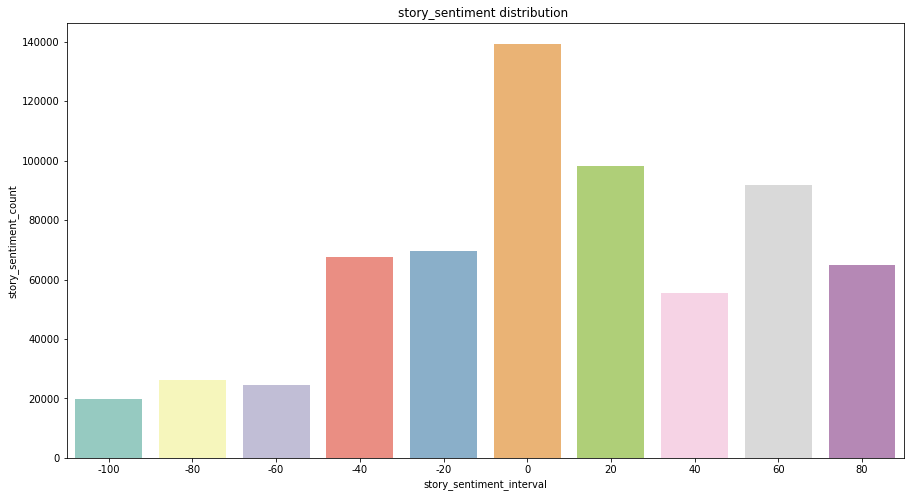

In [26]:
# plot
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(story_count_interval.story_sentiment_interval, story_count_interval.story_count, palette = "Set3")
plt.xlabel('story_sentiment_interval')
plt.ylabel('story_sentiment_count')
plt.title('story_sentiment distribution ')
plt.show()

# Event-Level

- **Exploration**:
  1. How many kinds of events/event_groups in the dataset?
  2. How many stories have one event/multiple events？
  3. How many stories mention one ticker/multiple tickers?

  

## Count event & event_group

In [27]:
len(df_moodys_new['event'].unique())

201

In [28]:
len(df_moodys_new['event_group'].unique())

26

In [29]:
# count events for each story 
df_moodys_count.head()

,story_id,counts
0,5bc5e90f19ea8e0001e9d60b,108
1,5c5954f06d24000001b4368e,42
2,5c1abe2fc5fea6cfee1438a6,35
3,5cc82452e3902f0001fd153e,35
4,5cc170ead9dd9f000165628a,34


In [30]:
len(df_moodys_count[df_moodys_count['counts'] >= 2])

428440

In [31]:
len(df_moodys_count[df_moodys_count['counts'] == 1])

228880

- **Conclusion**:
  - The dataset have 201 events and 26 types of event_group
  - 228880 stories have only one event
  - 428440 stories have multiple events




## Ticker frequency distribution

In [32]:
# generate a new df for counting tickers' frequency
df_moodys_tickers = df_moodys_new[['story_id','entity_ticker']]
# count tickers with its frequency of showing up in each story
df_moodys_tickers = df_moodys_tickers.groupby(['story_id', 'entity_ticker']).size().reset_index(name='count').sort_values('story_id')

# get a list with all the stories have only one ticker mentioned
story_id_list_2 = df_moodys_tickers.groupby('story_id')['entity_ticker'].count().reset_index(name='num_ticker')
story_id_list_2 = story_id_list_2[story_id_list_2['num_ticker']==1]['story_id'].values
# get all the stories which mention more than one ticker  
df_moodys_multiple_tickers = df_moodys_tickers[-df_moodys_tickers.story_id.isin(story_id_list_2)]
df_moodys_multiple_tickers = df_moodys_multiple_tickers.sort_values(['story_id','count'],ascending=False)
df_moodys_multiple_tickers.head(20)

,story_id,entity_ticker,count
795487,5cdae299aab5430001dc4260,AAL,2
795488,5cdae299aab5430001dc4260,BA,2
795485,5cdae264aab5430001dc4222,ABBV,2
795486,5cdae264aab5430001dc4222,ABT,1
795471,5cdae232a299e200012a551c,CMCSA,2
795472,5cdae232a299e200012a551c,DIS,2
795470,5cdae1fb6a0f970001cab64b,DIS,2
795469,5cdae1fb6a0f970001cab64b,CMCSA,1
795465,5cdae1b6d9dd9f0001a3973e,NKE,1
795466,5cdae1b6d9dd9f0001a3973e,UAA,1


In [33]:
len(df_moodys_multiple_tickers['story_id'].unique())

86701

- **Conclusion**:
  - 19614 stories mentioned only one ticker
  - 86701 stories mentioned multiple tickers

## `event_group` distribution

In [34]:
# count the rows(signals) thay each story has
event_group_count = df_moodys_new['event_group'].value_counts().reset_index(name='count')
event_group_count.columns = ['event_group', 'counts']

In [35]:
# create function for calculating percentage
def percentage(row):
    return (row['counts']/len(df_moodys))*100

In [36]:
# generate new column 'percentage(%)'
event_group_count['percentage(%)'] = event_group_count.apply(percentage, axis=1)
# set decimal precision
decimals = 2   
event_group_count['percentage(%)'] = event_group_count['percentage(%)'].apply(lambda x: round(x, decimals))
event_group_count.head()

,event_group,counts,percentage(%)
0,Company Financials,505211,23.04
1,General Business Actions,298320,13.60
2,Analyst Ratings,256946,11.72
3,Financing Activities,197532,9.01
4,Stock Activities,111313,5.08


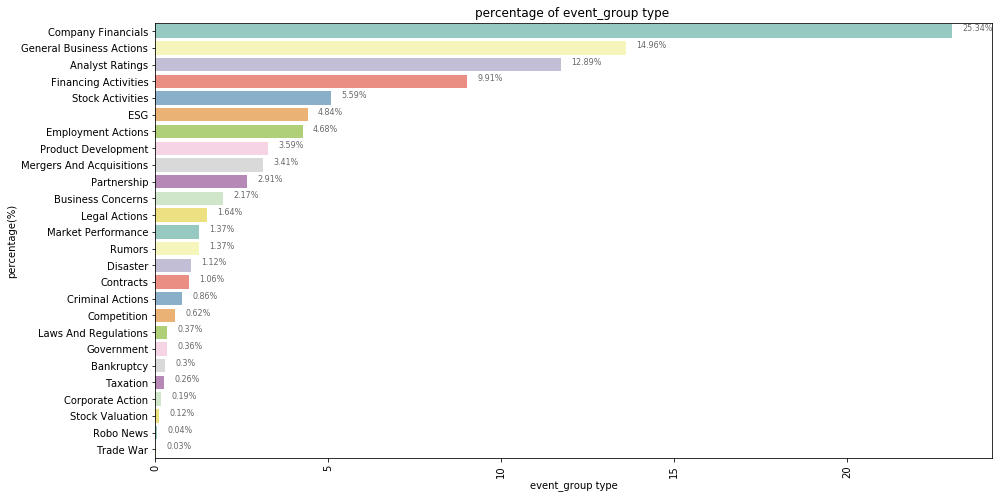

In [47]:
# plot
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(event_group_count['percentage(%)'], event_group_count.event_group, palette = "Set3")
plt.xlabel('event_group type')
plt.ylabel('percentage(%)')
plt.title('percentage of event_group type ')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
# get_width pulls left or right; get_y pushes up or down
ax.text(i.get_width()+.3, i.get_y()+.38, \
        str(round((i.get_width()/total)*100, 2))+'%', fontsize=8,
        color='dimgrey')   
plt.xticks(rotation=90)
plt.show()

## `event_sentiment` distribution

In [48]:
df_moodys_esd = df_moodys_new[['event','event_sentiment']]
df_moodys_esd.head()

,event,event_sentiment
0,Analyst Ratings - Upgrade,14.8
1,Analyst Ratings - General,2.0
2,Financing Activities - Investments,-11.3
3,Company Financials - Earnings,40.6
4,General Business Actions - Announcement,29.2


In [49]:
def quantity_interval_event_sentiment(row):
    if (row['event_sentiment'] >= 0) & (row['event_sentiment'] < 20) :
        return 0
    if (row['event_sentiment'] >= 20) & (row['event_sentiment'] < 40) :
        return 20
    if (row['event_sentiment'] >= 40) & (row['event_sentiment'] < 60) :
        return 40
    if (row['event_sentiment'] >= 60) & (row['event_sentiment'] < 80) :
        return 60
    if (row['event_sentiment'] >= 80) & (row['event_sentiment'] <= 100) :
        return 80
    if (row['event_sentiment'] >= -20) & (row['event_sentiment'] < 0) :
        return -20
    if (row['event_sentiment'] >= -40) & (row['event_sentiment'] < -20) :
        return -40
    if (row['event_sentiment'] >= -60) & (row['event_sentiment'] < -40) :
        return -60
    if (row['event_sentiment'] >= -80) & (row['event_sentiment'] < -60) :
        return -80
    else:
        return -100

In [50]:
# generate distribution
df_moodys_esd['event_quantity_interval'] = df_moodys_esd.apply(quantity_interval_event_sentiment, axis=1)
event_count_interval = df_moodys_esd.groupby('event_quantity_interval')['event'].count().reset_index(name='event_count')
event_count_interval

/Users/yangyufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,event_quantity_interval,event_count
0,-100,75660
1,-80,95276
2,-60,70750
3,-40,174992
4,-20,220133
5,0,439984
6,20,321931
7,40,111619
8,60,259292
9,80,223699


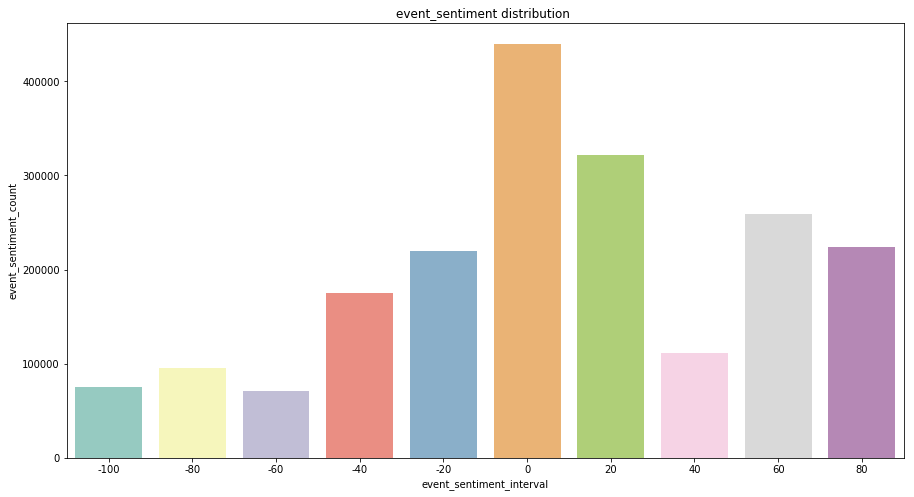

In [51]:
# plot
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(event_count_interval.event_quantity_interval, event_count_interval.event_count, palette = "Set3")
plt.xlabel('event_sentiment_interval')
plt.ylabel('event_sentiment_count')
plt.title('event_sentiment distribution ')
plt.show()

## `entity_sentiment` distribution

In [52]:
df_moodys_entity = df_moodys_new[['entity_ticker','entity_name','entity_sentiment']]
df_moodys_entity.head()

,entity_ticker,entity_name,entity_sentiment
0,DK,"Delek US Holdings, Inc.",62.4
1,DK,"Delek US Holdings, Inc.",62.4
2,DK,"Delek US Holdings, Inc.",62.4
3,BA,Boeing Company (The),40.6
4,BA,Boeing Company (The),40.6


In [53]:
# get the average entity sentiment of each ticker
df_moodys_entity = df_moodys_entity.groupby(['entity_ticker','entity_name'])['entity_sentiment'].agg([np.mean, 'count']).reset_index()
df_moodys_entity.sort_values('mean',ascending = False).head(20)

,entity_ticker,entity_name,mean,count
331,FTSI,FTS INTERNATIONAL INC,81.250000,2
623,PLNT,"Planet Fitness, Inc.",59.282303,356
86,AVHI,"A V Homes, Inc.",58.757143,7
316,FICO,Fair Isaac Corporation,52.903502,257
725,TDG,Transdigm Group Incorporated,51.438636,352
700,SPR,"Spirit Aerosystems Holdings, Inc.",51.297959,343
603,PBH,"Prestige Brand Holdings, Inc.",50.480319,188
783,USCR,"U S Concrete, Inc.",49.168310,142
382,HNGR,Hanger Inc,48.838000,50
1,1910,SAMSONITE INTERNATIONAL SA,47.070000,40


In [60]:
df_moodys_entity.sort_values('mean').head(20)

,entity_ticker,entity_name,mean,count
148,CBS,CBS Corporation,-20.032450,11658
356,GT,The Goodyear Tire & Rubber Company,-15.890466,4468
660,RL,Ralph Lauren Corporation,-12.537678,3790
605,PCG,Pacific Gas & Electric Co.,-10.779979,11618
685,SHLDQ,Sears Holdings Corporation,-10.012646,1455
400,IBM,International Business Machines Corporation,-7.431039,33026
816,WLB,Westmoreland Coal Company,-6.742291,227
462,LEA,Lear Corporation,-6.610778,668
489,MAT,"Mattel, Inc.",-6.569676,6335
624,PLOW,"Douglas Dynamics, Inc.",-4.043770,313


# Further Analysis

## Potential imbalanced data
	
- **story_sentiment**:
  1. Are there any stories that have both positive and negative events?
  2. 'story_sentiment_score': Score of the story_sentiment( a higher score means less potential imbalanced data in the story)


In [54]:
# get the potential imbalanced list by romove those stories with only one ticker mentioned
entity_sentiment = df_moodys_new[['story_id','entity_ticker','entity_name','entity_sentiment','entity_relevance','story_sentiment']]
entity_sentiment = entity_sentiment[~entity_sentiment.story_id.isin(story_id_list_2)]
entity_sentiment.sort_values('story_id').head(20)

,story_id,entity_ticker,entity_name,entity_sentiment,entity_relevance,story_sentiment
118447,5bbfc4c97a0c240001ad5b5a,AAPL,Apple Inc.,23.4,45.0,34.0
118713,5bbfc4c97a0c240001ad5b5a,AAPL,Apple Inc.,23.4,45.0,34.0
118358,5bbfc4c97a0c240001ad5b5a,GOOG,Alphabet Inc.,50.0,30.0,34.0
118446,5bbfc4c97a0c240001ad5b5a,AAPL,Apple Inc.,23.4,45.0,34.0
795134,5bbfc4d01b92a30001d5d495,CMCSA,Comcast Corporation,0.0,7.5,14.4
654975,5bbfc4d01b92a30001d5d495,NFLX,"Netflix, Inc.",0.0,10.0,14.4
653299,5bbfc4d01b92a30001d5d495,DIS,Walt Disney Company (The),0.0,5.0,14.4
795898,5bbfc4d01b92a30001d5d495,AMZN,"Amazon.com, Inc.",-25.0,15.0,14.4
646327,5bbfc4d01b92a30001d5d495,VZ,Verizon Communications Inc.,87.5,12.5,14.4
2030116,5bbfc56aa656f22bc1eface7,ANDV,Andeavor,37.2,45.0,30.3


In [55]:
# find stories have negative entity sentiment but get a positive story sentiment
# get the list of story with positive sentiment

neg_story_id_list = entity_sentiment[entity_sentiment['entity_sentiment']<0]
neg_story_id_list = neg_story_id_list['story_id'].unique()

# get the list of story with negative sentiment
potential_imbalanced_story_1 = entity_sentiment[entity_sentiment.story_id.isin(neg_story_id_list)]
pos_story_id_list = potential_imbalanced_story_1[potential_imbalanced_story_1['entity_sentiment']>0]
pos_story_id_list = pos_story_id_list['story_id'].unique()
potential_imbalanced_story_1 = potential_imbalanced_story_1[potential_imbalanced_story_1.story_id.isin(pos_story_id_list)]

# generate the final list of stories have negative entity sentiment but get a positive story sentiment
potential_imbalanced_story_1 = potential_imbalanced_story_1[potential_imbalanced_story_1['story_sentiment']>=0]
potential_imbalanced_story_1.sort_values('story_id').head(20)


,story_id,entity_ticker,entity_name,entity_sentiment,entity_relevance,story_sentiment
646327,5bbfc4d01b92a30001d5d495,VZ,Verizon Communications Inc.,87.5,12.5,14.4
795898,5bbfc4d01b92a30001d5d495,AMZN,"Amazon.com, Inc.",-25.0,15.0,14.4
795134,5bbfc4d01b92a30001d5d495,CMCSA,Comcast Corporation,0.0,7.5,14.4
653299,5bbfc4d01b92a30001d5d495,DIS,Walt Disney Company (The),0.0,5.0,14.4
654975,5bbfc4d01b92a30001d5d495,NFLX,"Netflix, Inc.",0.0,10.0,14.4
1990393,5bbfc6b7abb782000109ec4b,TSLA,"Tesla, Inc.",-12.0,8.2,9.0
1990395,5bbfc6b7abb782000109ec4b,PH,Parker-Hannifin Corporation,26.8,6.8,9.0
2134119,5bbfc6b7abb782000109ec4b,DIS,Walt Disney Company (The),-14.7,10.9,9.0
2134120,5bbfc6b7abb782000109ec4b,DIS,Walt Disney Company (The),-14.7,10.9,9.0
1990394,5bbfc6b7abb782000109ec4b,TSLA,"Tesla, Inc.",-12.0,8.2,9.0


In [56]:
len(potential_imbalanced_story_1.story_id.unique())

16209

- **Conclusion**:
  - 16209 of 675404 stories in our dataset have absolute unbalanced story sentiment


